# Simple linear regression

## Relevant importrs

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns

**Note**: Recall that the default for head() is to show the first 5 rows. If you change the value for n, you can show more rows. For example, if you load the sns dataset and call it "penguins," the command penguins.head(3) will show 3 rows.

In [ ]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data cleaning

In [ ]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

You can review the documentation for `dropna()` and `reset_index()`. In short, the `dropna()` function by default removes any rows with any missing values in any of the columns. The `reset_index()` function resets the index values for the rows in the dataframe. Typically, you use `reset_index()` after you've finished manipulating the dataset. By setting `inplace=True`, you will not create a new DataFrame object. By setting `drop=True`, you will not insert a new index column into the DataFrame object.

## Exploratory data analysis

Before you construct any model, it is important to get more familiar with your data. You can do so by performing exploratory data analysis or EDA. Please review previous program materials as needed if you would like to refamiliarize yourself with EDA concepts.

Since this part of the course focuses on simple linear regression, you want to check for any linear relationships among variables in the dataframe. You can do this by creating scatterplots using any data visualization package, for example `matplotlib.plt`, `seaborn`, or `plotly`.

To visualize more than one relationship at the same time, we use the `pairplot()` function from the seaborn package to create a scatterplot matrix.

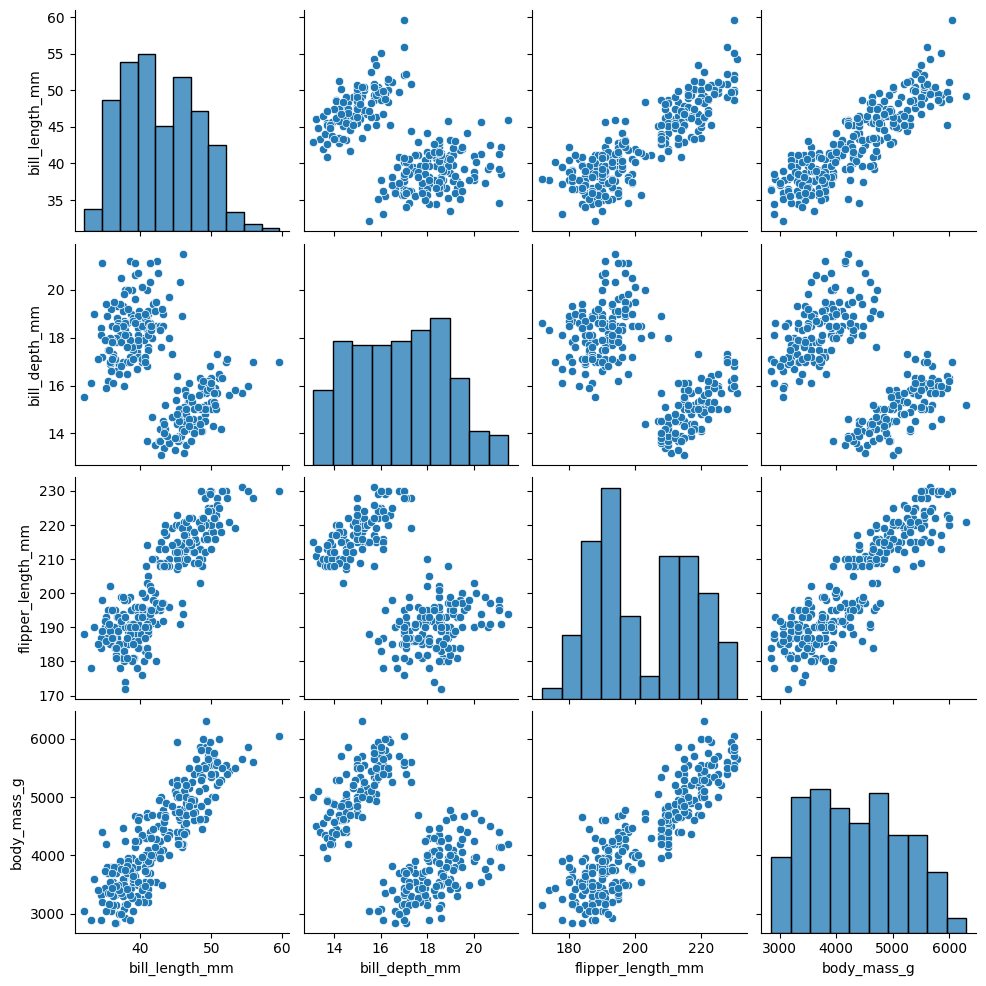

In [ ]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:
  - bill length (mm) and flipper length (mm)
  - bill length (mm) and body mass (g)
  - flipper length (mm) and body mass (g)

## Model Construction

Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets [[]], and listing the names of the columns of interest.

In [ ]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note**: The names of the x and y variables have to exactly match the column names in the dataframe

In [ ]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

In [ ]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

In [ ]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the `summary()` function on the model object to get the coefficients and more statistics about the `model`. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.33e-85
Time:                        19:09:54   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can use the `regplot()` function from seaborn to visualize the regression line.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

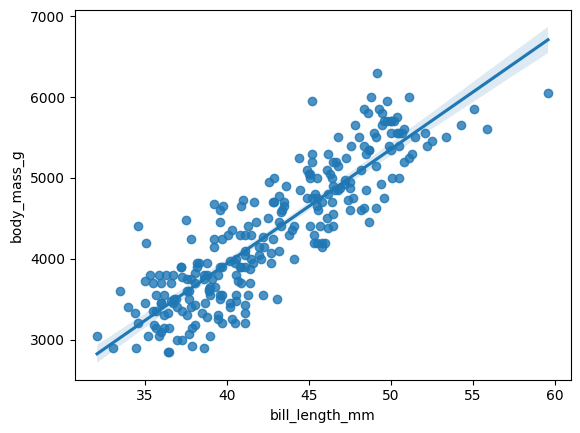

In [ ]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## Finish cheking model assumptions

As you learned in previous videos, there are four main model assumptions for simple linear regression, in no particular order:

  1. Linearity
  2. Normality
  3. Independent observations
  4. Homoscedasticity

You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the `bill_length_mm` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [ ]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

Then, you can save the model residuals as a variable by using the `model.resid` attribute.

In [ ]:
# Calculate residuals
residuals = model.resid

### Check the normality assumption
To check the normality assumption, you can create a histogram of the residuals using the `histplot()` function from the seaborn package.

From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

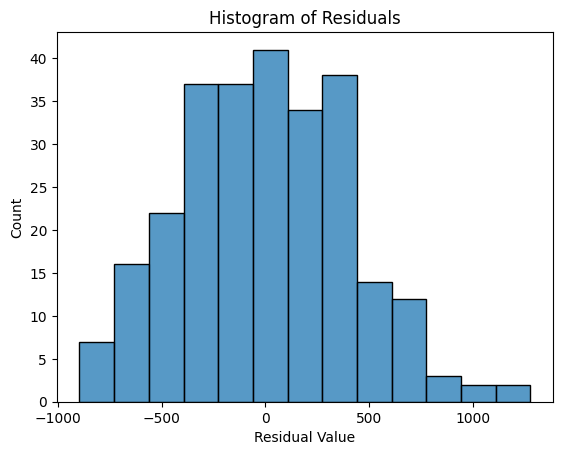

In [ ]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the `qqplot` function from the `statsmodels.api` package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

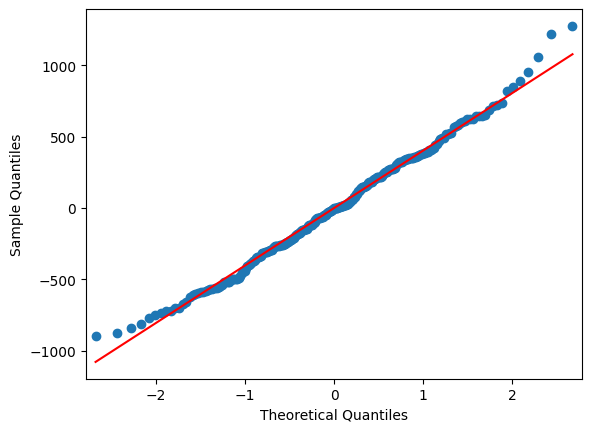

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.title("Q-Q plot of Residuals")
plt.show()

### Check the homoscedasticity assumption
Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

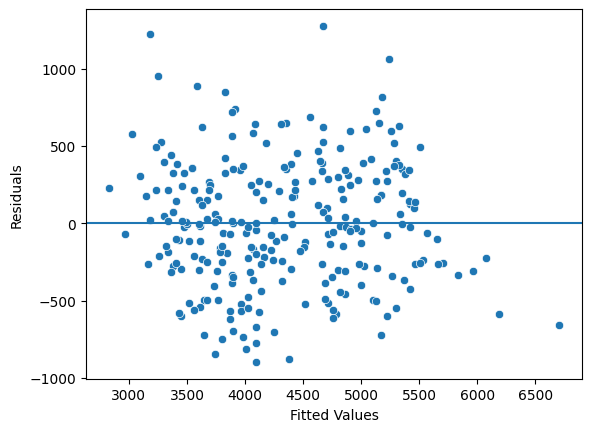

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

# Activity : Run simple linear regression

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales.

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## Step 1 : Imports

In [ ]:
# Import relevant Python libraries and modules


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# Load the dataset into a DataFrame and save in a variable

data = pd.read_csv("marketing_sales_data.csv")

## Step 2. Data Exploration


In [ ]:
# Display the first 10 rows of the data


data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Question 1: What do you observe about the different variables included in the data?**

  - The data includes the following information:
    - TV promotion budget (expressed as "Low", "Medium", or "High")
    - Radio promotion budget
    - Social media promotion budget
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
      - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.

    - Sales accrued from the promotion
    

In [ ]:
# Display number of rows, number of columns

data.shape

(572, 5)

**Question 2: What do you observe about the number of rows and number of columns in the data?**

  - There are 572 rows and 5 columns in the data. One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

### Data Cleaning

In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing


data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row

### YOUR CODE HERE ###

data.isna().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
567,False
568,False
569,False
570,False


In [ ]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###

data.isna().any(axis=1).sum()

np.int64(3)

**Drop the rows that contain missing values.**

This is an important step in data cleaning, as it makes the data more usable for the analysis and regression that you will conduct next.

In [ ]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result

### YOUR CODE HERE ###

data = data.dropna(axis=0)

In [ ]:
# Check to make sure that the data does not contain any rows with missing values now

# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###

data.isna().any(axis=1).sum()

np.int64(0)

### Check model assumptions.

You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

**Start by creating a plot of pairwise relationships in the data.**

This will help you visualize the relationships between variables in the data and help you check model assumptions.

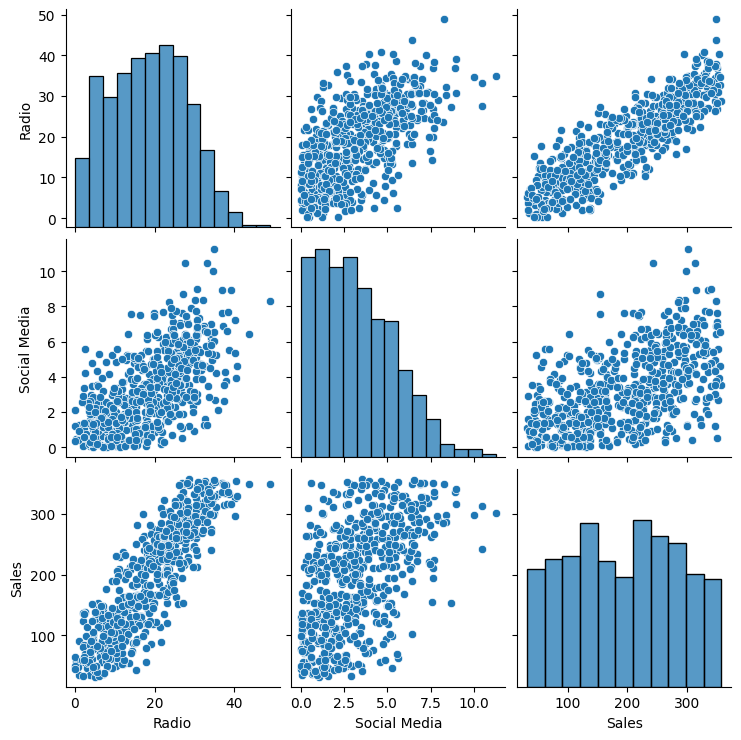

In [ ]:
# Create plot of pairwise relationships

sns.pairplot(data)

**Question 4: Is the assumption of linearity met?**

In the scatter plot of Sales over Radio, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

## Step 3. Model Building
**Start by selecting only the columns that are needed for the model that you will build from the data.**

In [ ]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression

ols_data = data[["Radio", "Sales"]]

In [ ]:
# Display first 10 rows of the new DataFrame to ensure it is accurate

### YOUR CODE HERE ###

ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [ ]:
# Write the linear regression formula between two variable of interest
# Save it in a variable

### YOUR CODE HERE ###

ols_formula = "Sales ~ Radio"

In [ ]:
# Implement OLS approach for linear regression

### YOUR CODE HERE ###

OLS = ols(formula = ols_formula, data = ols_data)

In [ ]:
# Fit the model to the data
# Save the fitted model in a variable

### YOUR CODE HERE ###

model = OLS.fit()

## Step 4. Results and Evaluation

Get a summary of the results from the model.

In [ ]:
# Get summary of results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          2.07e-176
Time:                        09:01:32   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyze the bottom table from the results summary.

Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope.

**Question 5: What is the y-intercept?**

  - The y-intercept is 41.5326.

**Question 6: What is the slope?**

  - The slope is 8.1733.

**Question 7: What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept?**
  - sales = 8.1733 * radio promotion budget + 41.5326

**Question 8: What do you think the slope in this context means?**

  - One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.

  - Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

**Finish checking model assumptions.**

Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

### Plot the OLS data with the best fit regression line.

<Axes: xlabel='Radio', ylabel='Sales'>

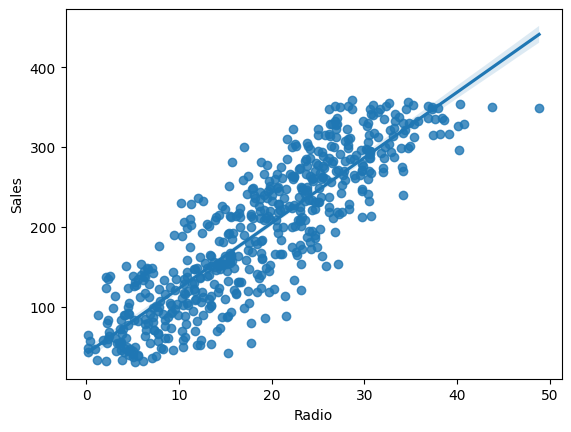

In [ ]:
# Plot the OLS data with the best fit regression line

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

**Question 9: What do you observe from the preceding regression plot?**

The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

### Check the normality assumption.
To get started, get the residuals from the model.

In [ ]:
# Get the residuals from the model

residuals = model.resid

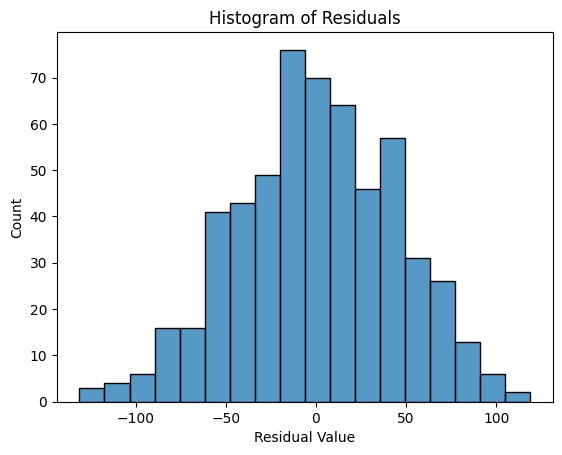

In [ ]:
# Visualize the distribution of the residuals

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Question 10: Based on the preceding visualization, what do you observe about the distribution of the residuals?**

  - Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

**Create a Q-Q plot to confirm the assumption of normality.**

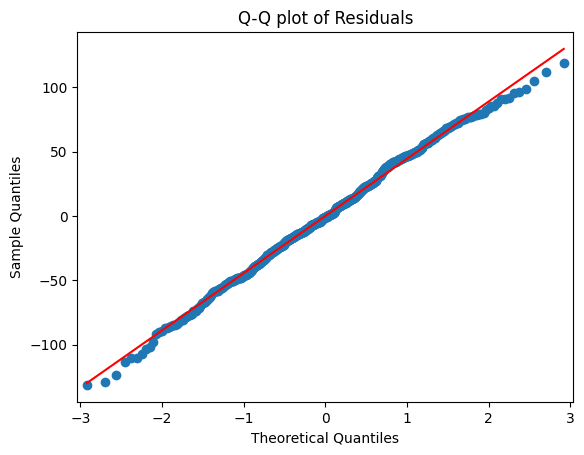

In [ ]:
# Create a Q-Q plot

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

**Question 11: Is the assumption of normality met?**

  - In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

### Check the assumptions of independent observation and homoscedasticity.

Start by getting the fitted values from the model.

In [ ]:
# Get fitted values

fitted_values = model.predict(ols_data["Radio"])

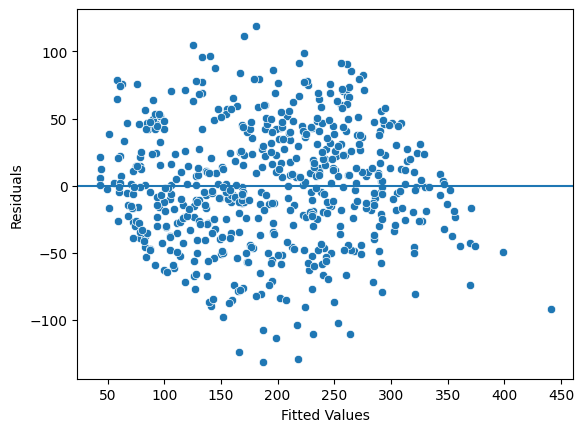

In [ ]:
# Create a scatterplot of residuals against fitted values

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

**Question 12: Are the assumptions of independent observation and homoscedasticity met?**

  - In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

## Conclusion

**What are the key takeaways from this lab?**

  - Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
  
  The results of a linear regression model can be used to express the relationship between two variables.

**What results can be presented from this lab?**

  - In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

  The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

  The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

**How would you frame your findings to external stakeholders?**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.

# Activity : Evaluate Simple Linear Regression

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [ ]:
# Load the data.

data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2 : Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.
The features in the data are:

  - TV promotion budget (in millions of dollars)
  - Social media promotion budget (in millions of dollars)
  - Radio promotion budget (in millions of dollars)
  - Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts Sales so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable.

**Question: What are some reasons for conducting an EDA before constructing a simple linear regression model?**

Potential reasons include:

  - Understanding which variables are present in the data
  - Reviewing the distribution of features, such as minimum, mean, and maximum values
  - Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X
  - Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Explore the data size
Calculate the number of rows and columns in the data.

In [ ]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

###Explore the independent variables
There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [ ]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

### YOUR CODE HERE ###

data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.
Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [ ]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.13%


**Question 2: What do you observe about the percentage of missing values in the Sales column?**

The preceding output shows that 0.13% of rows are missing the Sales value.

### Remove the missing data
Remove all rows in the data from which Sales is missing.

In [ ]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

### Visualize the sales distribution
Create a histogram to visualize the distribution of Sales.

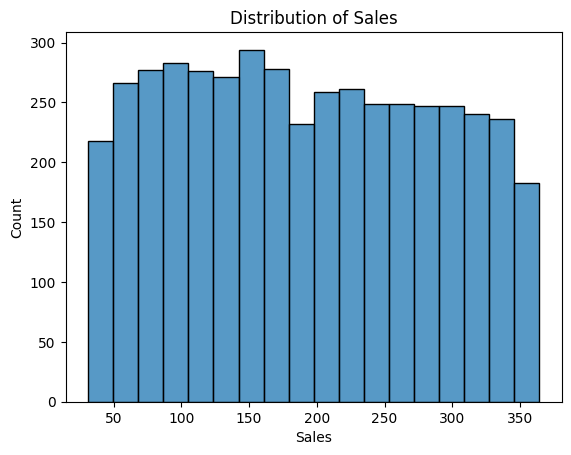

In [ ]:
# Create a histogram of the Sales.

fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

**Question: What do you observe about the distribution of Sales from the preceding histogram?**

Generally, Sales are equally distributed between 25 and 350 million.

### Step 3: Model building
Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with Sales. This will help you select the X variable for the simple linear regression.

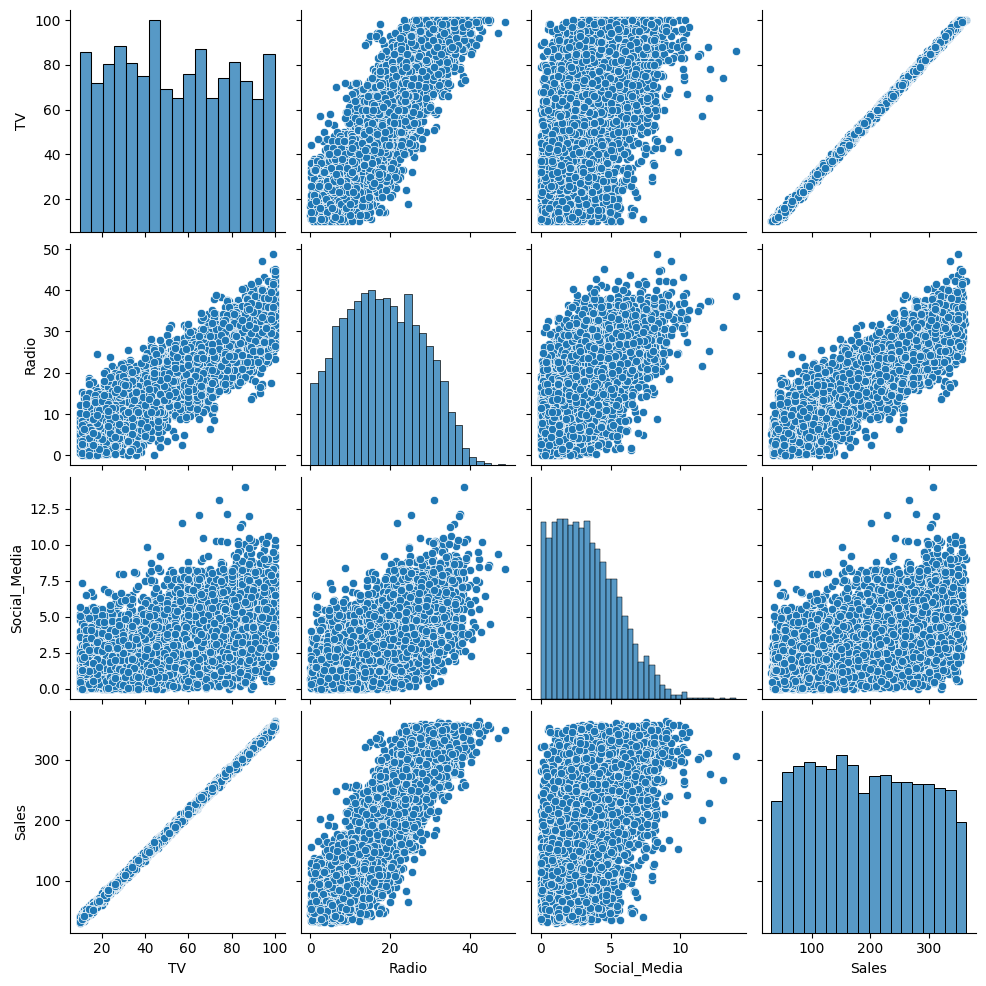

In [ ]:
# Create a pairplot of the data.

sns.pairplot(data);

**Question: Which variable did you select for X? Why?**

TV clearly has the strongest linear relationship with Sales. You could draw a straight line through the scatterplot of TV and Sales that confidently estimates Sales using TV. Radio and Sales appear to have a linear relationship, but there is larger variance than between TV and Sales.

### Build and fit the model
Replace the comment with the correct code. Use the variable you chose for X for building the model.

In [ ]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:45:29   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check model assumptions
To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:
  - Linearity
  - Independent Observations
  - Normality
  - Homoscedasticity

### Model assumption: Linearity
The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable.
Create a scatterplot comparing the X variable you selected with the dependent variable.

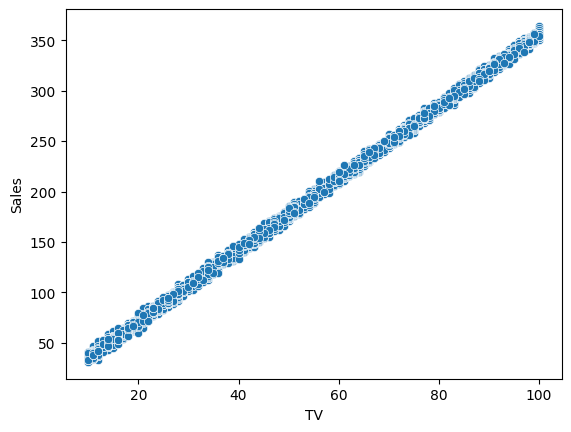

In [ ]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = data['TV'], y = data['Sales']);

**QUESTION: Is the linearity assumption met?**

There is a clear linear relationship between TV and Sales, meeting the linearity assumption.

### Model assumption: Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality
The normality assumption states that the errors are normally distributed.
Create two plots to check this assumption:

  - **Plot 1**: Histogram of the residuals
  - **Plot 2**: Q-Q plot of the residuals

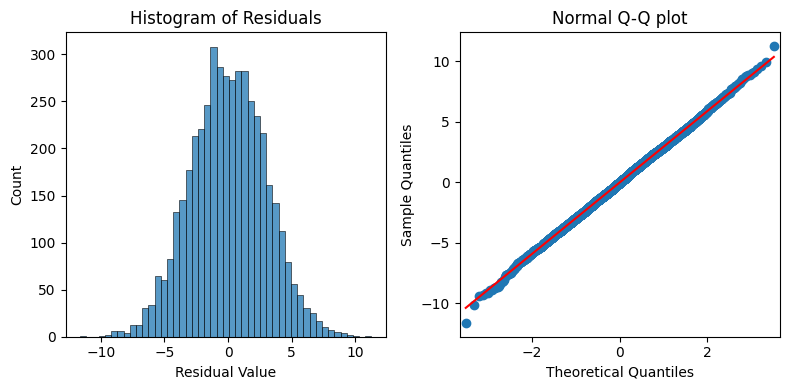

In [ ]:
# Calculate the residuals.

### YOUR CODE HERE ###

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

### YOUR CODE HERE ###

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ###

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Question: Is the normality assumption met?**

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of X.
Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at  𝑦=0

to visualize the variance of residuals above and below  𝑦=0.

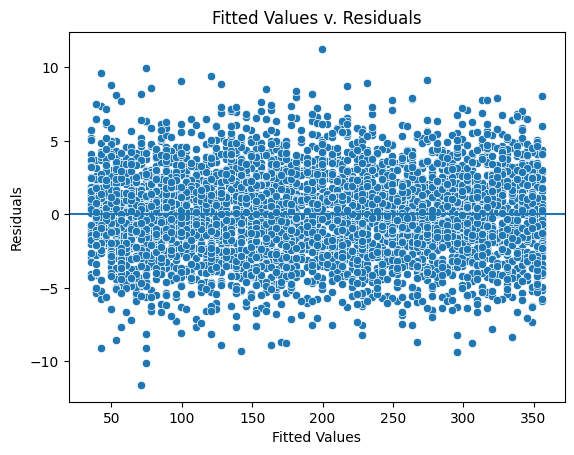

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ###

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ###

fig.axhline(0)

# Show the plot.
plt.show()

**QUESTION: Is the homoscedasticity assumption met?**

The variance of the residuals is consistant across all  𝑋. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

**Display the OLS regression results**

If the linearity assumptions are met, you can interpret the model results accurately.
Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [ ]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:45:29   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?**

Using `TV` as `X` results in a simple linear regression model with  `𝑅^2=0.999`. In other words, TV explains  `99.9%`
of the variation in `Sales`.

The R-squared value will depend on the variable selected for X.

### Interpret the model results
With the model fit evaluated, you can assess the coefficient estimates and the uncertainty of these estimates.

**Question: Based on the preceding model results, what do you observe about the coefficients?**

When TV is used as the independent variable X, the coefficient for the Intercept is -0.1263 and the coefficient for TV is 3.5614.

**Question: How would you write the relationship between X and Sales in the form of a linear equation?**

When TV is used as the independent variable X, the linear equation is:

  - 𝑌=Intercept+Slope∗𝑋

  - Sales (in millions)=Intercept+Slope∗TV (in millions)

  - Sales (in millions)=−0.1263+3.5614∗TV (in millions)

**Question: Based on this model, what is your interpretation of the relationship between X and Sales?**

According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

**Question: Why is it important to interpret the beta coefficients?**

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates
Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and 95%
95
%
confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.
Display the model results again.

In [ ]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:45:29   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?**

When TV is used as the independent variable, it has a p-value of  0.000
and a  95%
- confidence interval of  [3.558,3.565]. This means there is a  95% chance the interval  [3.558,3.565]
contains the true parameter value of the slope.

These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

**Question: Based on this model, what are you interested in exploring?**

Potential areas to explore include:

  - Providing the business with the estimated sales given different TV promotional budgets
  - Using both TV and Radio as independent variables
  - Adding plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line

**Question: What recommendations would you make to the leadership at your organization?**

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales.

## Considerations
**What are some key takeaways that you learned from this lab?**

  - Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
  - It's important to check that simple linear regression assumptions are met before interpreting model results.
  - R-squared is a useful measure of prediction error.
  - It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates.

**What findings would you share with others?**

  - Sales is relatively equally distributed between $25 and $350 million across all promotions.
  - In the data visualization, TV has the strongest linear relationship with sales. Radio and sales appear to have a moderate linear relationship, but there is larger variance than between TV and sales. Social media and sales appear to have a weak linear relationship.
  - When TV is used as the independent variable, the R-squared for the simple linear regression model estimating sales is 0.999.
  - When TV is used as the independent variable, the coefficient for the intercept is -0.1263 and the coefficient for TV is 3.5614.
  - When TV is used as the independent variable, the slope of the coefficient for TV has a p-value of 0.000 and a 95% confidence interval of [3.558, 3.565].

**How would you frame your findings to stakeholders?**
  - Among TV, social media, and radio, TV had the strongest positive linear relationship with sales.
  - The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
  - According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales.
  - The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.

# Multiple Linear Regression

## Relevant imports

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns

In [ ]:
# load dataset
penguins = sns.load_dataset("penguins", cache = False)

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data Cleaning

Clean the dataset by subsetting for specific columns, renaming columns, dropping rows with missing values, and resetting the index. For the purposes of this exercise, we will be focusing on the `body_mass_g`, `bill_length_mm`, `sex`, and `species` columns. In a work setting, you will need to make careful decisions about which variables to include or exclude. Later in this course, we will cover some of the techniques for variable selection. For now, our focus in just on building the model, and evaluating and interpreting the results.

In [ ]:
# Subset data
penguins = penguins[["body_mass_g","bill_length_mm","sex","species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

<ipython-input-3-fded9bf5a417>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins.dropna(inplace=True)


You can review the documentation for `dropna()` and `reset_index()`. In short, the `dropna()` function by default removes any rows with any missing values in any of the columns. The `reset_index()` function resets the index values for the rows in the dataframe. Typically, you use `reset_index()` after you've finished manipulating the dataset. By setting `inplace=True`, you will not create a new DataFrame object. By setting `drop=True`, you will not insert a new index column into the DataFrame objec

In [ ]:
# Examine first 5 rows of data
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


## Create holdout sample

Earlier, you learned about creating a holdout sample to better test and evaluate the results of your regression model. In order to do this more easily in Python, you must subset your x and y variables, import the `train_test_split` function from `sci-kit learn`, and then use the function. Please review the course content on holdout samples as needed before proceeding through the rest of the notebook.

In [ ]:
# Subset X and Y variables
penguins_X = penguins[["bill_length_mm","gender","species"]]
penguins_y = penguins[["body_mass_g"]]

In [ ]:
# import train-test-split function from sci-lit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y,
                                                    test_size = 0.3, random_state = 42)


## Model Construction

Recall that we have explored the penguin dataset before. Earlier, we used scatterplots to perform exploratory data anlysis, and we identified linear relationships between the following variables:

  - bill length (mm) and flipper length (mm)
  - bill length (mm) and body mass (g)
  - flipper length (mm) and body mass (g)

In this part of the course, we'll focus on understanding some of the variables' relationships with body mass (g). We'll use one continuous X variable, bill length (mm), and the two categorical variables, gender and species.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols() ` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [ ]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

In [ ]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

After we've imported the `ols()` function, we can save the `ols_data` as a dataframe, create the `ols` object, fit the model, and generate summary statistics. At this point, it would make sense to double check the model assumptions about errors (homoscedasticity and normality of residuals). Please review other resources in the program as needed.

In [ ]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis=1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data=ols_data)
model = OLS.fit()

## Model evaluation and interpretation

Use the `.summary()` function to get a summary table of model results and statistics.
Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

In [ ]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           1.31e-92
Time:                        20:24:39   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### C(gender) - Male
Given the name of the variable, we know that the variable was encoded as `Male = 1`, `Female = 0`. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.


### C(species) - Chinstrap and Gentoo
Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

### Bill length (mm)
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

# Perform Multiple Linear Regression

## Introduction

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

  - Exploring and cleaning data
  - Using plots and descriptive statistics to select the independent variables
  - Creating a fitting multiple linear regression model
  - Checking model assumptions
  - Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1 : Imports

In [ ]:
# Import libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

In [ ]:
# Load the data.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.
The features in the data are:

  - TV promotional budget (in "Low," "Medium," and "High" categories)
  - Social media promotional budget (in millions of dollars)
  - Radio promotional budget (in millions of dollars)
  - Sales (in millions of dollars)
  - Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

**Question: What are some purposes of EDA before constructing a multiple linear regression model?**

Potential reasons include:

  - Understanding which variables are present in the data
  - Reviewing the distribution of features, such as minimum, mean, and maximum values
  - Plotting the relationship between the independent and dependent variables to visualize which features have a linear relationship
  - Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in data.

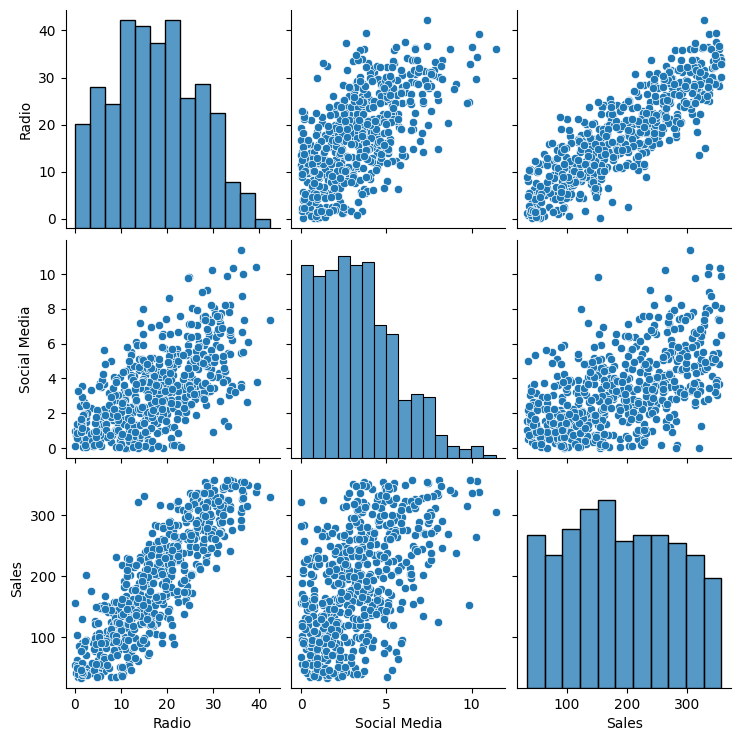

In [ ]:
# Create a pairplot of the data.

sns.pairplot(data);

**Question: Which variables have a linear relationship with Sales? Why are some variables in the data excluded from the preceding plot?**

`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating Sales.

`TV` and `Influencer` are excluded from the pairplot because they are not numeric.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`.

In [ ]:
# Calculate the mean sales for each TV category.

print(data.groupby('TV')['Sales'].mean())

print('')

# Calculate the mean sales for each Influencer category .

print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


Question: What do you notice about the categorical variables? Could they be useful predictors of `Sales`?

The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model.

### Remove missing data
This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [ ]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis=0)

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [ ]:
# Rename all columns in data that contain a space.

data = data.rename(columns={'Social Media': 'Social_Media'})

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales
Using the independent variables of your choice, fit a multiple linear regression model that predicts Sales using two or more independent variables from data.

In [ ]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.63e-288
Time:                        09:06:08   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: Which independent variables did you choose for the model, and why?**

  - `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
  - `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
  - `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
  - `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

## Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**.

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

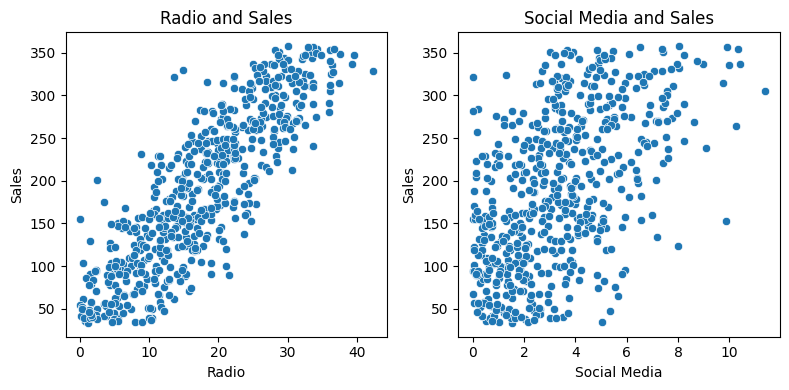

In [ ]:
# Create a scatterplot for each independent variable and the dependent variable.
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

**Question: Is the linearity assumption met?**

The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.

### Model assumption: Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality
Create the following plots to check the normality assumption:

  - **Plot 1**: Histogram of the residuals
  - **Plot 2**: Q-Q plot of the residuals

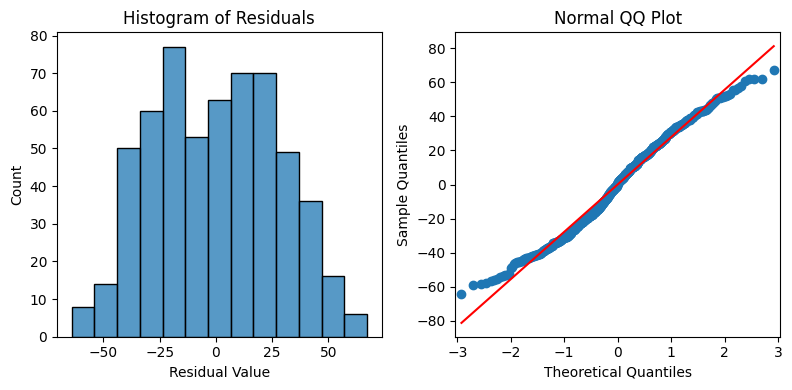

In [ ]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Question: Is the normality assumption met?**

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### **Model assumption: Constant variance**

Check that the constant variance assumption is not violated by creating a scatterplot with the fitted values and residuals.

Add a line at  𝑦=0 to visualize the variance of residuals above and below  𝑦=0.

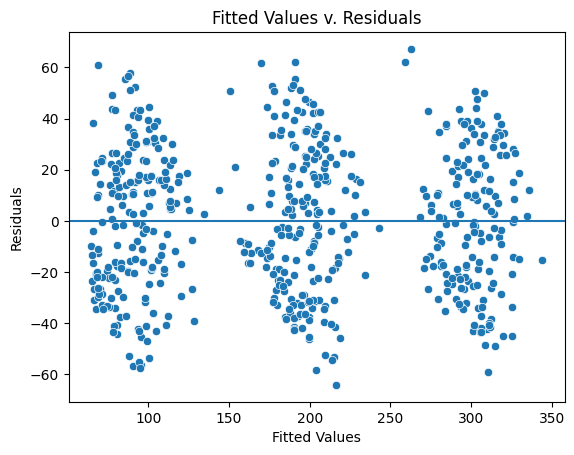

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

**Question 7: Is the constant variance assumption met?**

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity** assumption states that no two independent variables ( 𝑋𝑖 and  𝑋𝑗) can be highly correlated with each other.

Two common ways to check for multicollinearity are to:

  - Create scatterplots to show the relationship between pairs of independent variables
  - Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

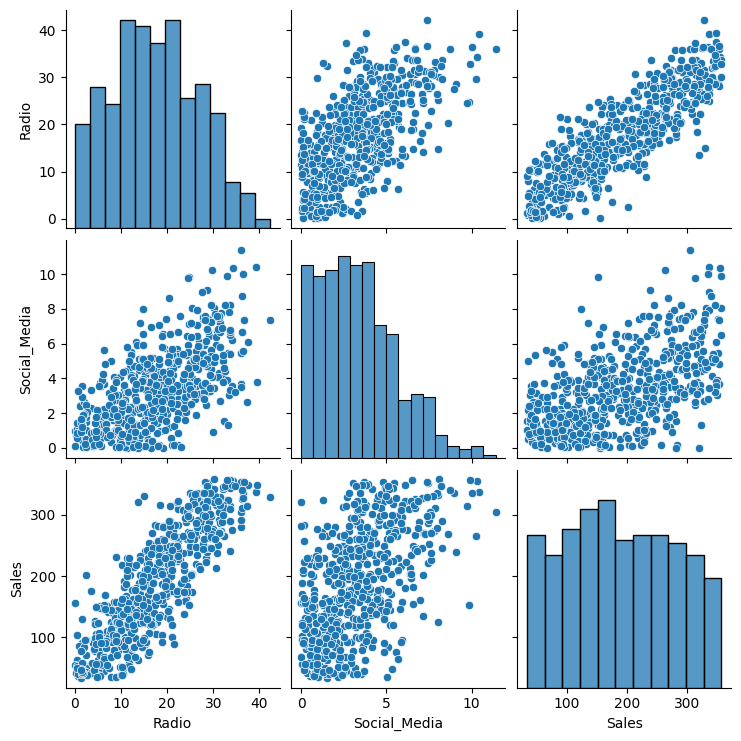

In [ ]:
# Method [01]
# Create a pairplot of the data.

sns.pairplot(data)

In [ ]:
# Method[02]
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables.
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


**Question 8: Is the no multicollinearity assumption met?**

The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.

## Step 4: Results and evaluation

### Display the OLS regression results
If the model assumptions are met, you can interpret the model results accurately.
First, display the OLS regression results.

In [ ]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.63e-288
Time:                        09:06:08   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: What is your interpretation of the model's R-squared?**

Using TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.904
 . In other words, the model explains  90.4%
  of the variation in Sales. This makes the model an excellent predictor of Sales.

**Interpret model coefficients**

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.
Again, display the OLS regression results.

In [ ]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.63e-288
Time:                        09:06:08   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: What are the model coefficients?**

When TV and Radio are used to predict Sales, the model coefficients are:

  - 𝛽0 = 218.5261

  - 𝛽𝑇𝑉𝐿𝑜𝑤 = −154.2971

  - 𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚 = −75.3120

  - 𝛽𝑅𝑎𝑑𝑖𝑜 = 2.9669


**Question: How would you write the relationship between Sales and the independent variables as a linear equation?**

Sales=𝛽0+𝛽1∗𝑋1+𝛽2∗𝑋2+𝛽3∗𝑋3

Sales=𝛽0+𝛽𝑇𝑉𝐿𝑜𝑤∗𝑋𝑇𝑉𝐿𝑜𝑤+𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+𝛽𝑅𝑎𝑑𝑖𝑜∗𝑋𝑅𝑎𝑑𝑖𝑜

Sales=218.5261−154.2971∗𝑋𝑇𝑉𝐿𝑜𝑤−75.3120∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+2.9669∗𝑋𝑅𝑎𝑑𝑖𝑜


**Question: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?**

The default `TV` category for the model is High since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` TV categories compared to the High `TV` category when Radio is at the same level.

For example, the model predicts that a Low `TV` promotion is 154.2971 lower on average compared to a high `TV` promotion given the same Radio promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000, meaning all coefficients are statistically significant at  𝑝=0.05. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a 95% chance that the interval  [−163.979,−144.616] contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a High TV promotion.

**Question: Why is it important to interpret the beta coefficients?**

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Question: Do you think your model could be improved? Why or why not? How?**

Given how accurate `TV` was as a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy.

## Considerations

### **What are some key takeaways that you learned from this lab?**

  - Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
  - Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
  - Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

### What findings would you share with others?

According to the model, high `TV` promotional budgets result in significantly more sales than medium and low `TV` promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝 = 0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a low `TV` promotional budget is chosen instead of a high `TV` promotion budget.

### **How would you frame your findings to stakeholders?**

High `TV` promotional budgets have a substantial positive influence on sales. The model estimates that switching from a `high` to `medium` `TV` promotional budget `reduces` **sales** by  
  - $ 75.3120  million
    
    **(95% CI  [−82.431,−68.193]).**

, and switching from a `high` to `low` `TV` promotional budget `reduces` **sales** by  
  - 154.297 USD
  million  
    **(95% CI  [−163.979,−144.616])**.
  
The model also estimates that an `increase` of **1 USD million** in the `radio` promotional budget will yield a  $2.9669
  million `increase` in **sales** (95% CI  [2.551,3.383]

Thus, it is `recommended` that the business **allot** a `high` promotional budget to `TV` when **possible** and **invest** in `radio` promotions to `increase` **sales**.

# Explore one-way vs. two-way ANOVA tests (PART |)

Recall the following definitions:
  - One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.

  - Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

### Relevant import

Begin by importing the relevant packages and data.

In [ ]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

In [ ]:
# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds",cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning |

For this part of the course, our main focus is on one-way and two-way ANOVA. This means that our dataset needs a continuous variable, and up to two categorical variables.


In [ ]:
# Check how many diamonds are each color grade
diamonds["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [ ]:
# Subset for colorless diamonds
colorless = diamonds[diamonds["color"].isin(["E","F","H","D","I"])]

# Select only color and price columns, and reset index
colorless = colorless[["color","price"]].reset_index(drop=True)

In [ ]:
# Remove dropped categories of diamond color
colorless.color = colorless.color.cat.remove_categories(["G","J"])

# Check that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [ ]:
# Import math package
import math

# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

**Note**: The first argument in the `insert()` function allows you to specify the location of the new column with a column number. But the argument starts counting at 0. So if you put in 0, that is the first column; if you enter 1, that is the second column, and so on. Since we specified 2, the new `log_price` column will be the third column.

Next, we use the `dropna()` function to drop the rows with missing values. Setting the `inplace` argument to `True` means that we do not have to save the dataframe as a new variable. Then, we'll reset the index using the `reset_index(`) function to reset the index column to account for the rows we just dropped. The `inplace` argument works the same as it did for the `dropna(`) function, and the `drop` argument prevents us from creating a new column with the old index numbers preserved.

In [ ]:
# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset index
colorless.reset_index(inplace=True, drop=True)

In [ ]:
# Examine first 5 rows of cleaned data set
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [ ]:
# Save to diamonds.csv
colorless.to_csv('diamonds.csv',index=False,header=list(colorless.columns))

**Note:** The code creates a new .csv file of the colorless dataframe, and names it diamonds.csv. The index argument tells the function whether or not we want to save the index column as a column in the .csv file. Additionally, the header argument tells the function what the names of the columns should be.

## One-way ANOVA

To run one-way ANOVA, we first load in the data, and save it as a variable called diamonds, and then examine it using the `head()` function.

In [ ]:
# Save diamonds.csv as a variable called diamonds
diamonds = pd.read_csv("diamonds.csv")

In [ ]:
# Examine first 5 rows of diamonds data set
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


Recall that one-way ANOVA helps us better understand the relationship between a categorical variable and a continuous variable. We'll do some basic exploratory data analysis by creating a boxplot using the `boxplot()` function from the seaborn package.

Based on the plot, we can observe that there is a lot of overlap in the distribution of `log_price` for each color of diamond. But we can't tell yet if they are statistically significantly different.

<Axes: xlabel='color', ylabel='log_price'>

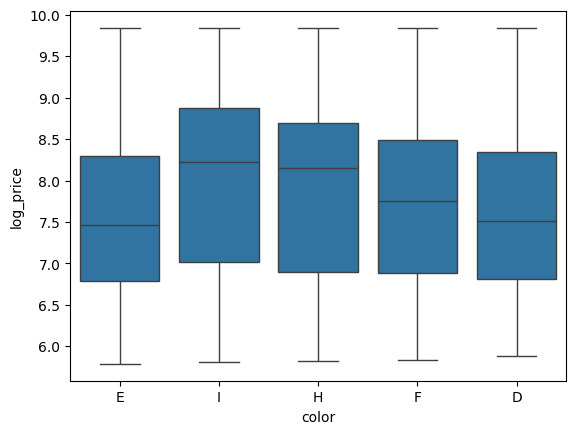

In [ ]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = "color", y = "log_price", data = diamonds)

In order to run ANOVA, we need to create a regression model. To do this, we'll import the `statsmodels.api` package and the `ols()` function. Next, we'll create a simple linear regression model where the X variable is `color`, which we will code as categorical using `C()`. Then, we'll fit the model to the data, and generate model summary statistics.

In [ ]:
# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

In [ ]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.61e-225
Time:                        16:51:24   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades' associated beta coefficients all have a p-value of less than 0.05 (check the `P>|t|` column). But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

First, we have to state our null and alternative hypotheses:

**Null Hypothesis**

  - **𝐻0**: 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒𝐻 = 𝑝𝑟𝑖𝑐𝑒𝐼

There is no difference in the price of diamonds based on color grade.

**Alternative Hypothesis**

  - **𝐻1**: Not 𝑝𝑟𝑖𝑐𝑒𝐷 = 𝑝𝑟𝑖𝑐𝑒𝐸 = 𝑝𝑟𝑖𝑐𝑒𝐹 = 𝑝𝑟𝑖𝑐𝑒𝐻 = 𝑝𝑟𝑖𝑐𝑒𝐼

There is a difference in the price of diamonds based on color grade.

In [ ]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [ ]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [ ]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


We use the `anova_lm()` function from the `statsmodels.stats` package. As noted previously, the function requires a fitted regression model, and for us to specify the type of ANOVA: 1, 2, or 3. You can review the statsmodels documentation to learn more, as well as to this article and this explanation on StackExchange. Since the p-value (column `PR(>F)`) is very small, we can reject the null hypothesis that the mean of the price is the same for all diamond color grades.

**Technical note**: The type of an ANOVA and the number of ways of an ANOVA are two distinct concepts: "type" (`typ` in `statsmodels.stats.anova.anova_lm()`) refers to how the sums of squares (these quantities are the building blocks for ANOVA) are calculated, while "K-way" means that there are K categorical factors in the analysis.

## Data cleaning II

In this part of the notebook, we will prepare a second dataset so we can perform a two-way ANOVA, which requires two categorical variables. We will start with the same diamonds dataset from the seaborn package.

In [ ]:
# Import diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

In [ ]:
# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Below, we go through a very similar process as above. We start by selecting the columns of interest: `color`, `cut`, and `price`. Then, we subset only for certain color grades, and remove the dropped colors from the list of categories using the `remove_categories()` function.

Next, we subset for specific diamond cuts: `Ideal`, `Premium`, and `Very Good`, and remove the dropped cuts from the list of categories.

Next, we remove rows with missing data, and reset the index.

Lastly, we add in a column for the logarithm of the price.

In [ ]:
# Subset for color, cut, price columns
diamonds2 = diamonds[["color","cut","price"]]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]

# Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price
diamonds2.insert(3,"log_price",[math.log(price) for price in diamonds2["price"]])

In [ ]:
# Examine the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [ ]:
# Save as diamonds2.csv
diamonds2.to_csv('diamonds2.csv',index=False,header=list(diamonds2.columns))

## Two-Way ANOVA
Now we can load in the dataset we just created using the read_csv() function from pandas.

In [ ]:
# Load the data set
diamonds2 = pd.read_csv("diamonds2.csv")

In [ ]:
# Examine the first 5 rows of the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


Then we'll create a multiple linear regression model using the `ols()` function, fit the model to the data, and get the summary statistics.

Note: This regression model includes two categorical X variables: `color` and `cut`, and a variable to account for the interaction between `color` and `cut`. The interaction is denoted using the : symbol.

In [ ]:
# Construct a multiple linear regression with an interaction term between color and cut
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

In [ ]:
# Get summary statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        17:06:51   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05 (check the `P>|t|` column). Additionally, some of the interactions also seem statistically significant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

First, we have to state our three pairs of null and alternative hypotheses:

  - **Null Hypothesis (`Color`)**

$$H_0: price_D=price_E=price_F=price_H=price_I$$

      There is no difference in the price of diamonds based on color.

  - **Alternative Hypothesis (`Color`)**

  $$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

      There is a difference in the price of diamonds based on color.

  - **Null Hypothesis (`Cut`)**

  $$H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

      There is no difference in the price of diamonds based on cut.


  - **Alternative Hypothesis (`Cut`)**

$$H_1: \text{Not } price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

      There is a difference in the price of diamonds based on cut.

  - **Null Hypothesis (`Interaction`)**

  $$H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$$

  - **Alternative Hypothesis (Interaction)**

$$H_1: \text{There is an interaction effect between color and cut on diamond price.}$$

The syntax for a two-way ANOVA is the same as for a one-way ANOVA. We will continue to use the anova_lm() function from statsmodels.stats.


In [ ]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [ ]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [ ]:
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


Since all of the p-values (column `PR(>F)`) are very small, we can reject all three null hypotheses.

# ANOVA post hoc test (Part II)

This part of the notebook contains all of the code that will be presented in the second part of this section in the course. The focus is on post hoc tests after one-way ANOVA using the statsmodels package in Python.

Recall the following definitions:

  - **One-way ANOVA**: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
  - **Post hoc test**: Performs a pairwise comparison between all available groups while controlling for the error rate.

**Note**: Recall that if we run multiple hypothesis tests all with a 95% confidence level, there is an increasing chance of a false positive, or falsely rejecting the null hypothesis. The post hoc test will control for this, and allows us to run many hypothesis tests while remaining confident with the accuracy of the results. Otherwise, be very careful when running multiple hypothesis tests.

### Relevant Imports

We'll start by importing the `statsmodels` package and the `ols` function so we can construct a simple linear regression model. Next, we load in the dataset from the one-way ANOVA.

In [ ]:
# Import statsmodels package and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Load in the data set from one-way ANOVA
diamonds = pd.read_csv("diamonds.csv")

## One-way ANOVA
Here we follow the same steps as above:
  - Build a simple linear regression model
  - Check the results
  - Run one-way ANOVA

In [ ]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

In [ ]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.61e-225
Time:                        17:47:33   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have reconstructed the simple linear regression model, we can re-run the ANOVA.

In [ ]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


Since the p-value is very small and we can reject the null hypothesis that the mean price is the same for all diamond color grades, we can continue on to run a post hoc test. The post hoc test is useful because the one-way ANOVA does not tell us which colors are associated with different prices. The post hoc test will give us more information.

## Post hoc test
There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests is the **Tukey's HSD (honestly significantly different) test**. We can import the `pairwise_tukeyhsd()` function from the `statsmodels` package to run the test.

In [ ]:
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Then we can run the test. The endog variable specifies which variable is being compared across groups, which is log_price in this case. Then the groups variables indicates which variable holds the groups we're comparing, which is color. alpha tells the function the significance or confidence level, which we'll set to 0.05. We'll aim for the typical 95% confidence level.

In [ ]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

### Results

Lastly, we get the results of the test.

In [ ]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Each row represents a pariwise comparison between the prices of two diamond color grades. The `reject` column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

  - **Test 1: D vs. E**

$H_0: price_D=price_E$

The price of D and E color grade diamonds are the same.

$H_1: price_D \neq price_E$

The price of D and E color grade diamonds are not the same.

**Result:** We *cannot* reject the null hypothesis that the price of D and E color grade diamonds are the same.

  - **Test 2: D vs. F**
$H_0: price_D=price_F$

The price of D and F color grade diamonds are the same.

$H_1: price_D \neq price_F$

The price of D and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and F color grade diamonds are the same.

  - **Test 3: D vs. H**

$H_0: price_D=price_H$

The price of D and H color grade diamonds are the same.

$H_1: price_D \neq price_H$

The price of D and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and H color grade diamonds are the same.

  - **Test 4: D vs. I**

$H_0: price_D=price_I$

The price of D and I color grade diamonds are the same.

$H_1: price_D \neq price_I$

The price of D and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and I color grade diamonds are the same.

  - **Test 5: E vs. F**

$H_0: price_E=price_F$

The price of E and F color grade diamonds are the same.

$H_1: price_E \neq price_F$

The price of E and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and F color grade diamonds are the same.

  - **Test 6: E vs. H**

$H_0: price_E=price_H$

The price of E and H color grade diamonds are the same.

$H_1: price_E \neq price_H$

The price of E and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same.

  - **Test 7: E vs. I**

$H_0: price_E=price_I$

The price of E and I color grade diamonds are the same.

$H_1: price_E \neq price_I$

The price of E and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same.

  - **Test 8: F vs. H**

$H_0: price_F=price_H$

The price of F and H color grade diamonds are the same.

$H_1: price_F \neq price_H$

The price of F and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same.

  - **Test 9: F vs. I**

$H_0: price_F=price_I$

The price of F and I color grade diamonds are the same.

$H_1: price_F \neq price_I$

The price of F and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same.

  - **Test 10: H vs. I**

$H_0: price_H=price_I$

The price of H and I color grade diamonds are the same.

$H_1: price_H \neq price_I$

The price of H and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same.


# Activity : Hypothesis testing with Python

## Introduction



As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting.

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:

  - Using plots and descriptive statistics to select a categorical independent variable
  - Creating and fitting a linear regression model with the selected categorical independent variable
  - Checking model assumptions
  - Performing and interpreting a one-way ANOVA test
  - Comparing pairs of groups using an ANOVA post hoc test
  - Interpreting model outputs and communicating the results to nontechnical stakeholders

## Step 1: Imports

Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [ ]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Load the dataset `marketing_sales_data`.csv as data, and display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab.

In [ ]:
# Load the data.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
  - TV promotion budget (in Low, Medium, and High categories)
  - Social media promotion budget (in millions of dollars)
  - Radio promotion budget (in millions of dollars)
  - Sales (in millions of dollars)
  - Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question**: Why is it useful to perform exploratory data analysis before constructing a linear regression model?

Potential reasons include:

  - To understand which variables are present in the data
  - To consider the distribution of features, such as minimum, mean, and maximum values
  - To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
  - To identify issues with the data, such as incorrect or missing values.

## Step 2: Data exploration

First, use a boxplot to determine how Sales vary based on the TV promotion budget category.

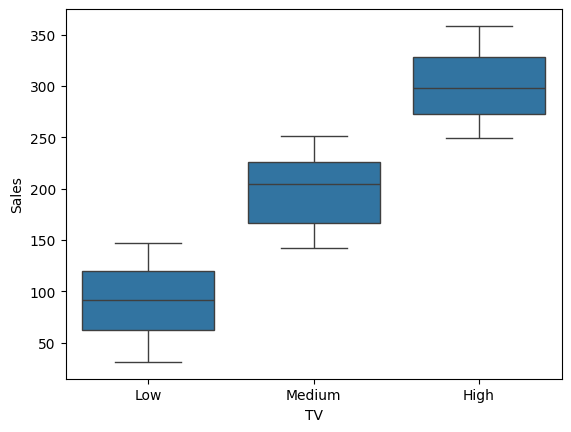

In [ ]:
# Create a boxplot with TV and Sales.

sns.boxplot(x = "TV", y = "Sales", data = data);

**Question**: Is there variation in `Sales` based off the `TV` promotion budget?

There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

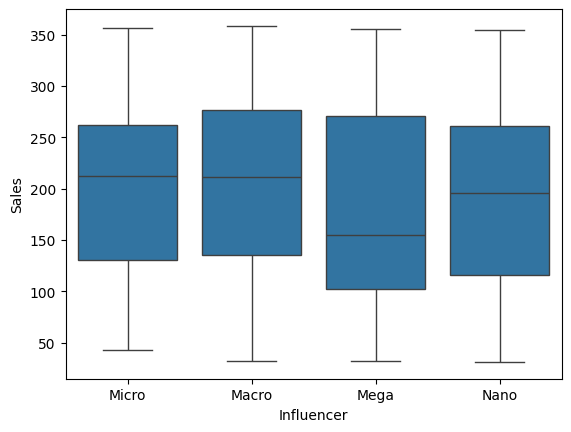

In [ ]:
# Create a boxplot with Influencer and Sales.


sns.boxplot(x = "Influencer", y = "Sales", data = data);

**Question**: Is there variation in Sales based off the Influencer size?

There is some variation in Sales across the Influencer groups, but it may not be significant.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [ ]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna(axis=0)


# Confirm the data contain no missing values.

data.isnull().sum(axis=0)

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


## Step 3: Model building
Fit a linear regression model that predicts Sales using one of the independent categorical variables in data. Refer to your previous code for defining and fitting a linear regression model.

In [ ]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 08 May 2025   Prob (F-statistic):          8.81e-256
Time:                        21:38:50   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question**: Which categorical variable did you choose for the model? Why?

  - `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
  - `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

## Check model assumptions
Now, check the four linear regression assumptions are upheld for your model.

**Question**: Is the linearity assumption met?

Because your model does not have any continuous independent variables, the linearity assumption is not required.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the `normality` assumption is upheld for the model.

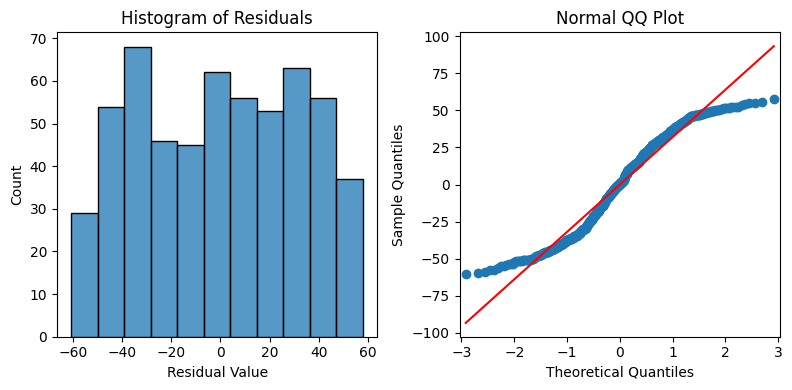

In [ ]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Question**: Is the normality assumption met?

There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

However, for the purpose of the lab, continue assuming the normality assumption is met.

Now, verify the `constant variance` (`homoscedasticity`) assumption is met for this model.

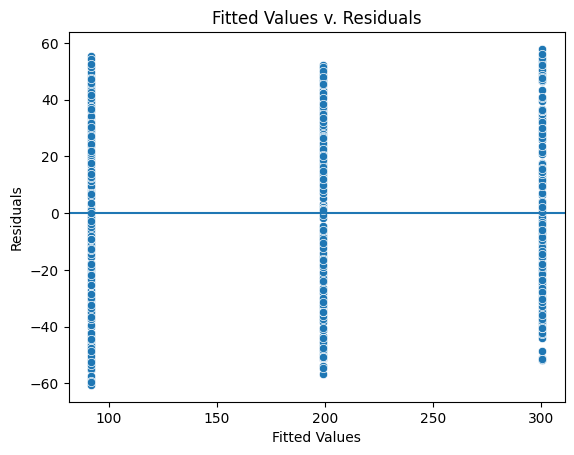

In [ ]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

**Question**: Is the constant variance (homoscedasticity) assumption met?

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## Step 4: Results and evaluation
First, display the OLS regression results.

In [ ]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 08 May 2025   Prob (F-statistic):          8.81e-256
Time:                        21:38:50   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question**: What is your interpretation of the model's R-squared?

Using `TV` as the independent variable results in a linear regression model with  𝑅2=0.874. In other words, the model explains  87.4%
  of the variation in `Sales`. This makes the model an effective predictor of `Sales`.

**Question**: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default `TV` category for the model is `High`, because there are coefficients for the other two `TV` categories, `Medium` and `Low`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. For example, the model predicts that a `Low` `TV` promotion would be 208.813 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion.

**Question**: Do you think your model could be improved? Why or why not? How?

Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.

### Perform a one-way ANOVA test
With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups.

In [ ]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


**Question**: What are the null and alternative hypotheses for the ANOVA test?

  - The null hypothesis is that there is no difference in `Sales` based on the `TV` promotion budget.
  - The alternative hypothesis is that there is a difference in `Sales` based on the `TV` promotion budget.

**Question**: What is your conclusion from the one-way ANOVA test?

The F-test statistic is 1971.46 and the p-value is  8.81∗10−256 (i.e., very small). Because the p-value is less than 0.05, you would reject the null hypothesis that there is no difference in Sales based on the TV promotion budget.

**Question:** What did the ANOVA test tell you?

The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [ ]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


**Question:** What is your interpretation of the Tukey HSD test?

The first row, which compares the `High` and `Low` `TV` groups, indicates that you can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups.

You can also reject the null hypotheses for the two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.

**Question:** What did the post hoc tell you?

A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

The results were that `Sales` is not the same between any pair of `TV` groups.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

* Box-plots are a helpful tool for visualizing the distribution of a variable across groups.
* One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:
* Estimated difference between the mean sales resulting from High and Low TV promotions: \$208.81 million (with 95% confidence that the exact value for this difference is between 200.99 and 216.64 million dollars).
* Estimated difference between the mean sales resulting from High and Medium TV promotions: \$101.51 million (with 95% confidence that the exact value for this difference is between 93.69 and 109.32 million dollars).
* difference between the mean sales resulting from Medium and Low TV promotions: \$107.31 million (with 95\% confidence that the exact value for this difference is between 99.71 and 114.91 million dollars).

The linear regression model estimating `Sales` from `TV` had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`.

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test.

# Binomial logistic regression (Part 1)

### Relevant Import

In [ ]:
# import pandas and seaborn
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [ ]:
# Load in if csv is in the same folder as notebook
activity = pd.read_csv("activity.csv")

In [ ]:
# Get summary statistics about dataset
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [ ]:
# Examine the dataset
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


## Construct binomial logistic regression model

For binomial logistic regression, we'll be using the `scikit-learn` package, which is frequently used for machine learning and more advanced data science topics. For the purposes of this exercise, we'll only load in the functions we need: `train_test_split()` and `LogisticRegression()`.

In [ ]:
# Load in sci-kit learn functions for contructing logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Then, we'll save the data into variables called X and y so we can use the `train_test_split()` function more easily. Remember that you can subset specific columns of a DataFrame object by using double square brackets: `[[]]` and listing the columns in between, separated by commas.

In [ ]:
# Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Then we'll split the data into training and holdout datasets. We set the `test_size` to `0.3` so that the holdout dataset is only 30% of the total data we have. We'll set the `random_state` equal to `42`. If you change this variable, then your results will be different from ours. Setting the `random_state` is mainly for reproducibility purposes.

In [ ]:
# Split dataset into training and holdout dataset
X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Then we'll build our classifier, and fit the model to the data by using the `.fit()` function. We'll save the fitted model as a variable called `clf`.

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Get coefficients and visualize model

We can use the `coef_` and `intercept_` attributes of the `clf` object to get the coefficient and intercept of our model.

In [ ]:
# Print the coefficient
clf.coef_

array([[-0.1177471]])

In [ ]:
# Print the intercept
clf.intercept_

array([6.10180958])

So, based on what we've found, our model has an intercept or $\beta_0$ of 6.10 and a $\beta_1$ of -0.12. Now we can plot our model and data with a 95% confidence band using the `regplot()` function from the `seaborn` package. Remember to set the argument `logistic=True` so that the function knows we are plotting a logistic regression model, not a linear regression model.

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

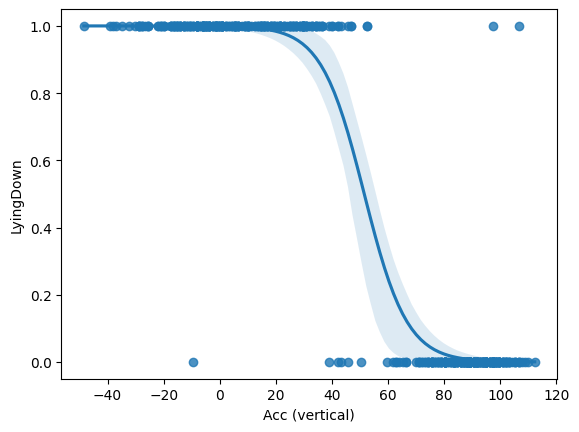

In [ ]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y= "LyingDown", data=activity ,logistic=True)

# Confusion matrix (Part II)

This part of the notebook contains all of the code that will be presented in the second part of this section in the course. The focus is on **confusion matrices**, which are used to evaluate classification models, such as a binomial logistic regression model.

**Note:** We are assuming that the earlier parts of this notebook have been run, and that the existing variables and imported packages have been saved.

## Construct logistic regression model

Once again, we split our data, which is currently saved as variables `X` and `y`, into training and holdout datasets using the `train_test_split()` function. The function has already been imported from the `scikit-learn` package. Then, we build the model by using the `LogisticRegression()` function with the `.fit()` function.

Next, we can save our model's predictions by inputting the holdout sample, `X_test` into the model's `.predict()` function.

In [ ]:
# Split data into training and holdout samples
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can print out the predicted labels by just calling on `clf.predict(X_test)`. Recall that 0 means not lying down, and 1 means lying down.

In [ ]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

But, the model actually calculates a probability that given a particular value of X, the person is lying down. We can print out the predicted probabilities with the following line of code. You can read more about the [`LogisticRegression()` function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), its attributes, and related functions on the `scikit-learn` website.

In [ ]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

## Create confusion matrix

To finish this part of the course, we'll create a confusion matrix. Recall the following definition:

* **Confusion matrix:** A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

To create a confusion matrix, we'll use the [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) function from the `metrics` module of `scikit-learn`. To use the function, we'll need to input the following:
* Actual labels of the holdout sample, stored as `y_test`
* Predicted labels of the holdout sample, stored as `y_pred`
* The names of the labels, which you can access using `clf.classes_`

**Note:** If there were more classes, we would have more numbers or labels in `clf.classes_`. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [ ]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

In [ ]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [ ]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

We can define the above bolded terms as follows in our given context:
* **True negatives**: The number of people that were not lying down that the model accurately predicted were not lying down.
* **False negatives**: The number of people that were lying down that the model inaccurately predicted were not lying down.
* **False positives**: The number of people that were not lying down that the model inaccurately predicted were lying down.
* **True positives**: The number of people that were lying down that the model accurately predicted were lying down.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

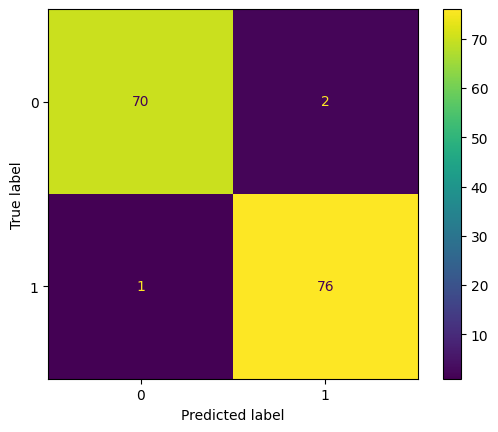

In [ ]:
# Display the confusion matrix
disp.plot()

# Activity : Perform logistic regression

## Introduction
In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.
Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

  - Importing packages and loading data
  - Exploring the data and completing the cleaning process
  - Building a binomial logistic regression model
  - Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [ ]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# important imports for preprocessing, modeling and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset
Load the **Invistico_Airline.csv** dataset. Save the resulting pandas DataFrame in a variable named `df_original`.

In [ ]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

In [ ]:
df_original.head(n=10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes:

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data.

In [ ]:
df_original.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [ ]:
df_original["satisfaction"].value_counts(dropna=False)

,count
satisfaction,
satisfied,71087
dissatisfied,58793


**Question**: How many satisfied and dissatisfied customers were there?

There were 71,087 satisfied customers and 58,793 dissatisfied customers.

**Question**: What percentage of customers were satisfied?

54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy.

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [ ]:
df_original.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


**Question**: Should you remove rows where the Arrival Delay in Minutes column has missing values, even though the airline is more interested in the inflight entertainment column?

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The Arrival Delay in Minutes column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

* There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.

* This column might impact the relationship between entertainment and satisfaction.

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [ ]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object."

Make the `Inflight entertainment` column "of type float."

In [ ]:
df_subset = df_subset.astype({"Inflight entertainment": float})

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding

In [ ]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

### Output the first 10 rows of `df_subset`
To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [ ]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [ ]:
X = df_subset[["Inflight entertainment"]]
y = df_subset[["satisfaction"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**Question**: If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable?

Other variables, like `Departure Delay in Minutes` seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data.

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Obtain parameter estimates

Make sure you output the two parameters from your model.

In [ ]:
clf.coef_

array([[0.99752883]])

In [ ]:
clf.intercept_

array([-3.19359054])

### Create a plot of your model
Create a plot of your model to visualize results using the seaborn package.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

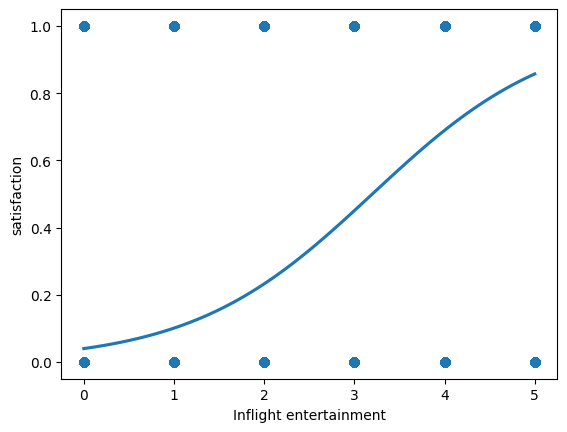

In [ ]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

**Question**: What can you tell from the graph?

The graph seems to indicate that the higher the `inflight entertainment` value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as `Inflight entertainment` is categorical.

## Step 4: Results and evaluation

### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [ ]:
# Save prediction

y_pred = clf.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`.

In [ ]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


### Use the `predict_proba` and `predict` functions on `X_test`

In [ ]:
# USe predict_prob to output a probablity

clf.predict_proba(X_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [ ]:
# Use predict to output 0's and 1's.

clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

### Analyze the results
Print out the model's accuracy, precision, recall, and F1 score.

In [ ]:

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

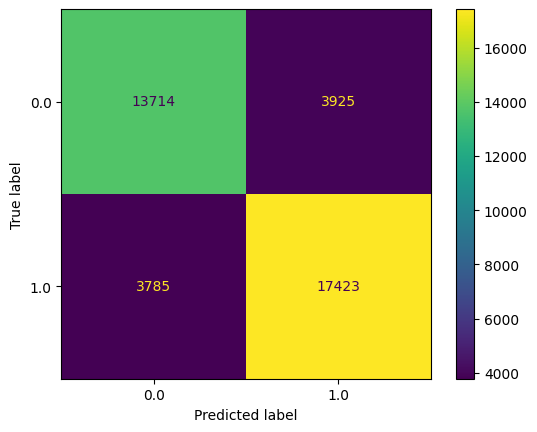

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**Question**: What stands out to you about the confusion matrix?

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Question**: Did you notice any difference in the number of false positives or false negatives that the model produced?

There isn't a large difference in the number of false positives and false negatives.

**Question**: What do you think could be done to improve model performance?

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

##  Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating.
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction.
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.